In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

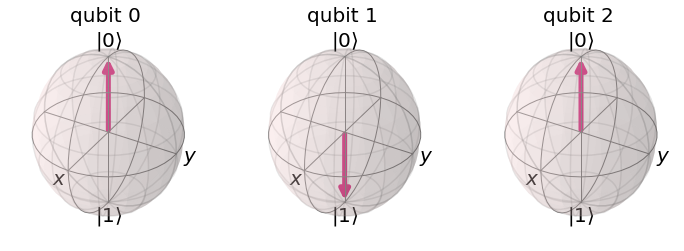

In [8]:
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState = stateGenerator('010')
circ.initialize(initializedState, qr)
getBloch(circ)

In [9]:
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)

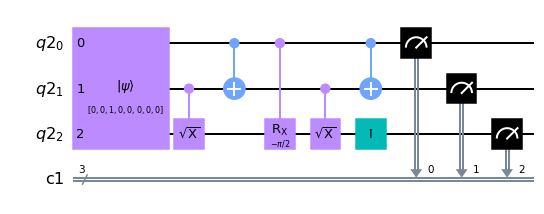

In [10]:
circ.draw('mpl')

['110']


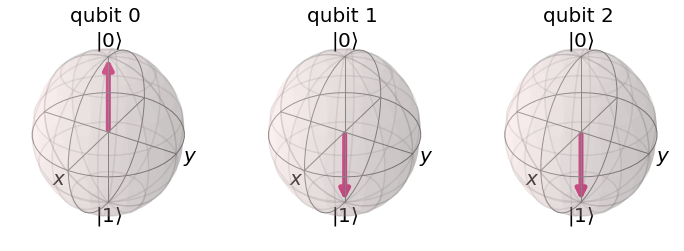

In [11]:
print(getMeasure(circ, 1))
getBloch(circ)

In [12]:
circ = QuantumCircuit(qr)
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)

In [13]:
qbsc = circ.to_gate(label=' QBSC')

In [25]:
circ2 = QuantumCircuit(7)
circ2.append(qbsc, [0, 1, 2])

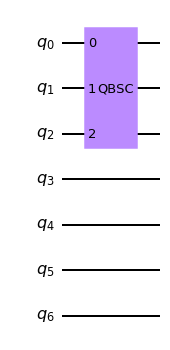

In [26]:
circ2.draw('mpl')

In [27]:
midcirc = QuantumCircuit(4)

#less than greater than
midcirc.cx(0, 2)
midcirc.crx(-pi/2, 2, 3)
midcirc.cx(1, 2)
midcirc.csx(1, 3)
midcirc.csx(2, 3)
midcirc.cx(3, 2)

#equal
midcirc.x(0)
midcirc.cx(0, 1)

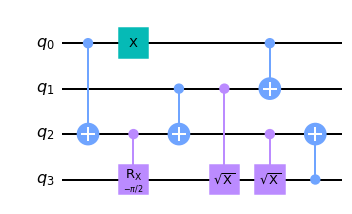

In [28]:
midcirc.draw('mpl')

In [29]:
mqc = midcirc.to_gate(label=' MQC')

In [30]:
circ2.append(mqc, [3, 4, 5, 6])

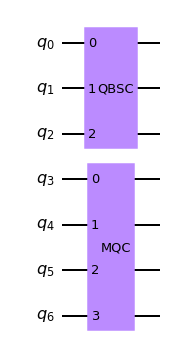

In [31]:
circ2.draw('mpl')